<a href="https://colab.research.google.com/github/nhatchung14/PythonNotebooks/blob/master/2_randomForest_for_bill_authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive'/'Colab Notebooks'/Lab7/3-random-forest

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Lab7/3-random-forest


# Random Forest in Python

In [0]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
dataset_filename = "bill_authentication.csv"

In [0]:
dataset = pd.read_csv(dataset_filename)

## 1) Data Analysis

In [16]:
dataset.shape

(1372, 5)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [18]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [19]:
# Overview about dataset
dataset.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [20]:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Visualization

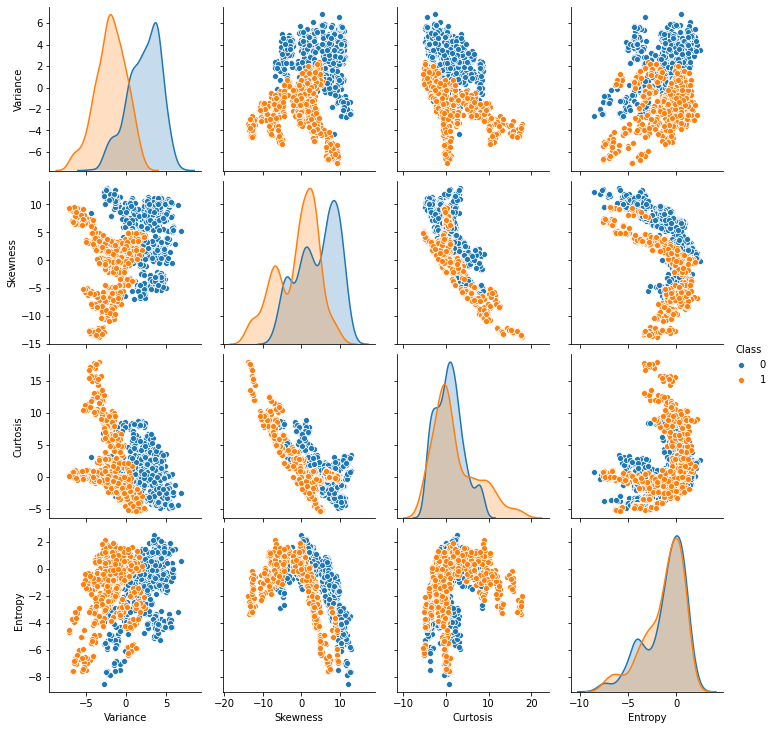

In [21]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(dataset, hue = 'Class', kind='scatter')
plt.show()

**Correlation table and heatmap**

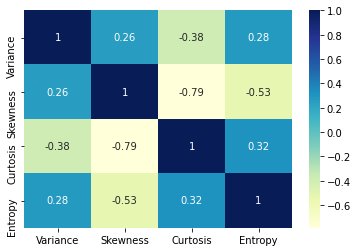

In [22]:
# Let's see the correlation between different variables.
sns.heatmap(dataset.drop('Class', axis = 1). corr(), cmap="YlGnBu", annot = True)
plt.show()

`Curtosis` and `Skewness` have high correlation

### 2) Training data and test data

#####  `features` and `labels`

In [0]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(1097, 4) 1097
(275, 4) (275,)


## 3) Random Forest classifer

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier in which  number of trees is 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [26]:
# fit data to the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
# 
clf.n_classes_ 

2

In [28]:
# labels
clf.classes_ 

array([0, 1])

In [29]:
# no of features
clf.n_features_ 

4

### Prediction:

In [30]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

### Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[139   1]
 [  1 134]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.99      0.99      0.99       135

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [32]:
y_test.values.shape

(275,)

In [33]:
y_pred.shape

(275,)

##### Accuracy

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred)

0.9927272727272727

In [35]:
accuracy_score = clf.score(X_test, y_test)
print(f"Random Forest classifier accuracy score for training set is {accuracy_score}")

Random Forest classifier accuracy score for training set is 0.9927272727272727


### Feature Importance

In [37]:
clf.feature_importances_

array([0.55150459, 0.23866073, 0.1527093 , 0.05712539])

In [38]:
#Series object
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Variance    0.551505
Skewness    0.238661
Curtosis    0.152709
Entropy     0.057125
dtype: float64

##### Visualize the feature importance

No handles with labels found to put in legend.


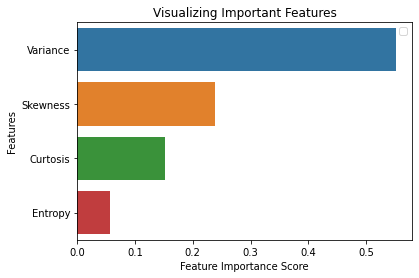

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Variance if the most importance feature where as entropy is the least

## 4) Develop model based on Selected Features

In [40]:
X_train

,Variance,Skewness,Curtosis,Entropy
153,3.45910,11.1120,-4.20390,-5.093100
558,4.38460,-4.8794,3.36620,-0.029324
550,3.97190,1.0367,0.75973,1.001300
802,0.60050,1.9327,-3.28880,-0.324150
391,2.12650,6.8783,0.44784,-2.222400
...,...,...,...,...
40,4.17110,8.7220,-3.02240,-0.596990
127,3.78180,-2.8846,2.25580,-0.157340
1168,0.74067,1.7299,-3.19630,-0.145700
222,1.09870,0.6394,5.98900,-0.582770


In [0]:
# remove Entropy feature
X_train_selected = X_train.drop('Entropy', axis = 1)
X_test_selected = X_test.drop('Entropy', axis = 1)

In [42]:
X_train_selected

,Variance,Skewness,Curtosis
153,3.45910,11.1120,-4.20390
558,4.38460,-4.8794,3.36620
550,3.97190,1.0367,0.75973
802,0.60050,1.9327,-3.28880
391,2.12650,6.8783,0.44784
...,...,...,...
40,4.17110,8.7220,-3.02240
127,3.78180,-2.8846,2.25580
1168,0.74067,1.7299,-3.19630
222,1.09870,0.6394,5.98900


In [43]:
# rebuild model
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Model Evaluation

In [44]:
# accuracy of model
accuracy_score = clf2.score(X_test_selected, y_test)
print(f"Random Forest classifier accuracy score is {accuracy_score}")

Random Forest classifier accuracy score is 0.9927272727272727


same accuracy achieved